## Data Cleaning / Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [11]:
max_rows=1000000
datatype={"sexo":str,"ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str}
df   =pd.read_csv("./data/train_ver2.csv",dtype=datatype, nrows=max_rows) #read in train dataset

D:\Users\xiao.feng\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
unique_ids=pd.Series(train['ncodpers'].unique())#get unique ids for clients

In [13]:
unique_ids.count()

626159

In [6]:
#select 12000 members sample
#limit_people=1.2e4
#unique_id=unique_ids.sample(n=limit_people)
#unique_id.count()

D:\Users\xiao.feng\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:2644: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  locs = rs.choice(axis_length, size=n, replace=replace, p=weights)


12000

In [10]:
#create subset of original train, name it data, explore data 
#df=train[train.ncodpers.isin(unique_id)]
#df.describe()

NameError: name 'unique_id' is not defined

In [14]:
#create new column month

df['fecha_alta']=pd.to_datetime(df['fecha_alta'])
df['fecha_dato']=pd.to_datetime(df['fecha_dato'])
df['month']=pd.DatetimeIndex(df['fecha_dato']).month

In [15]:
df.isnull().any() #missing value columns

fecha_dato               False
ncodpers                 False
ind_empleado              True
pais_residencia           True
sexo                      True
age                      False
fecha_alta                True
ind_nuevo                 True
antiguedad               False
indrel                    True
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                   True
indext                    True
conyuemp                  True
canal_entrada             True
indfall                   True
tipodom                   True
cod_prov                  True
nomprov                   True
ind_actividad_cliente     True
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

# Data visualization

##  Age and Gross income of the household distribution - matplotlib.hist

In [18]:
df['age']=pd.to_numeric(df['age'],errors="coerce")

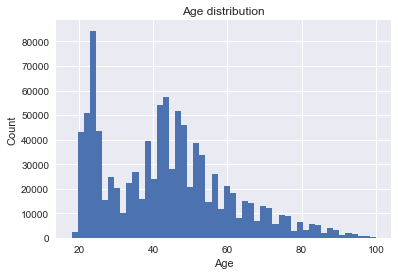

In [19]:
df['age']=pd.to_numeric(df['age'],errors="coerce")
df['age'].hist(bins=50,range=[18,100])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
#plt.hist(df['age'],bins=50)
#plt.show()

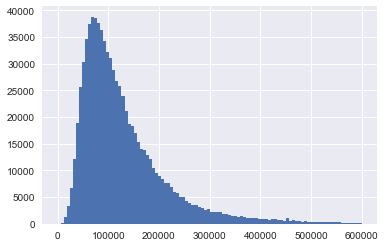

In [27]:
df['renta']=pd.to_numeric(df['renta'],errors='coerce')
df['renta'].hist(bins=100,range=[0,600000])

## boxplot of renta for each provenance

In [51]:
df['nomprov'].unique()

array(['MALAGA', 'CIUDAD REAL', 'ZARAGOZA', 'TOLEDO', 'LEON', 'GIPUZKOA',
       'CACERES', 'GIRONA', 'ZAMORA', 'BARCELONA', 'SALAMANCA', 'BURGOS',
       'HUESCA', 'NAVARRA', 'AVILA', 'SEGOVIA', 'LUGO', 'LERIDA', 'MADRID',
       'ALICANTE', 'SORIA', 'SEVILLA', 'CANTABRIA', 'BALEARS, ILLES',
       'VALLADOLID', 'PONTEVEDRA', 'VALENCIA', 'TERUEL', 'CORUÑA, A',
       'OURENSE', 'JAEN', 'CUENCA', 'BIZKAIA', 'CASTELLON', 'RIOJA, LA',
       'ALBACETE', 'BADAJOZ', 'MURCIA', 'CADIZ', nan, 'ALMERIA',
       'GUADALAJARA', 'PALENCIA', 'PALMAS, LAS', 'CORDOBA', 'HUELVA',
       'GRANADA', 'ASTURIAS', 'SANTA CRUZ DE TENERIFE', 'MELILLA',
       'TARRAGONA', 'ALAVA', 'CEUTA'], dtype=object)

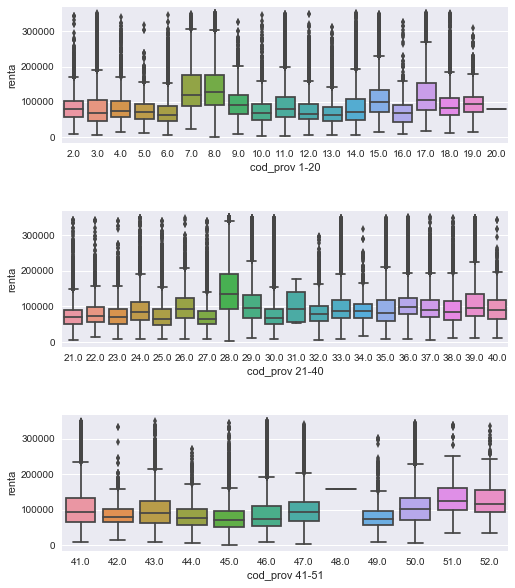

In [58]:
max_renta=350000
df1=df.loc[(df.renta<=max_renta)&(df.cod_prov>0)&(df.cod_prov<=20)]
df2=df.loc[(df.renta<=max_renta)&(df.cod_prov>20)&(df.cod_prov<=40)]
df3=df.loc[(df.renta<=max_renta)&(df.cod_prov>40)&(df.cod_prov<=60)]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8,10))
plt.subplots_adjust(hspace=0.5)

boxplot1=sns.boxplot(x="cod_prov",y='renta',data=df1,ax=axes[0])
boxplot2=sns.boxplot(x="cod_prov",y='renta',data=df2,ax=axes[1])
boxplot3=sns.boxplot(x="cod_prov",y='renta',data=df3,ax=axes[2])

boxplot1.set(xlabel='cod_prov 1-20')
boxplot2.set(xlabel='cod_prov 21-40')
boxplot3.set(xlabel='cod_prov 41-51')

## Violinplot age spread by product and gender

In [63]:
df.columns[24]

'ind_ahor_fin_ult1'

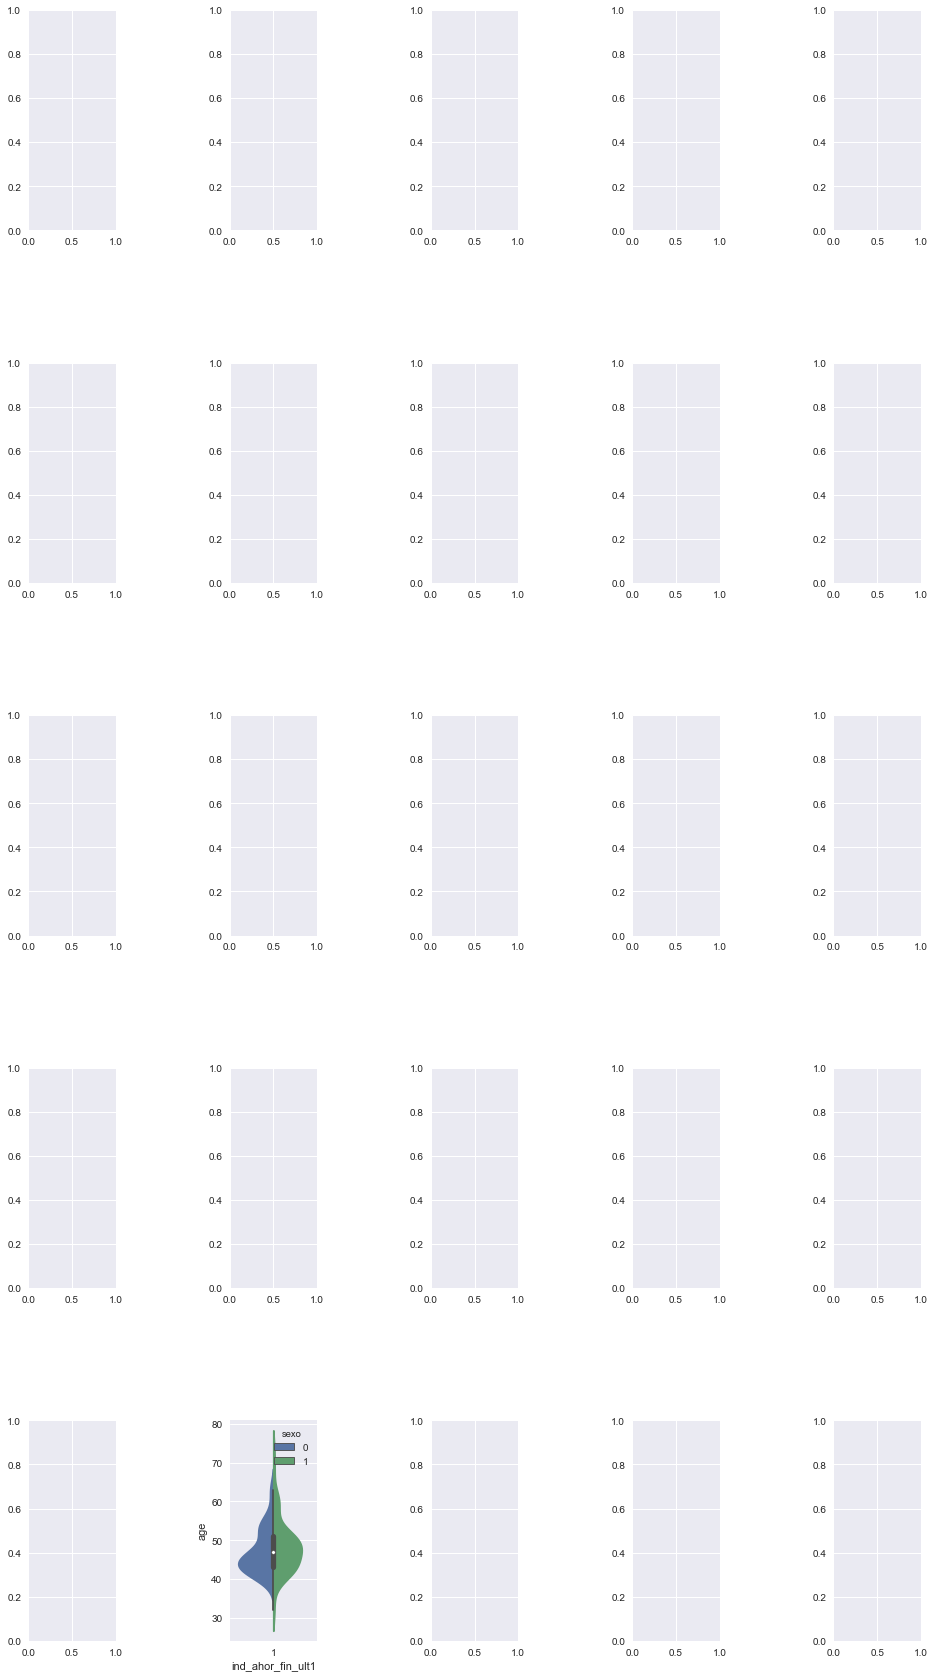

In [73]:
fig,axes=plt.subplots(nrows=5,ncols=5,figsize=(16,30))
plt.subplots_adjust(wspace=1.3, hspace=0.6)
fig_row=0
for i in range(24,48):
feat=df.columns[i]

viol_plot=sns.violinplot(x=df.columns[24],y='age',hue='sexo',data=df[(df[feat]==1)&(df['age']<100)],ax=axes[4][1],split=True)




## ind_nuevo -	New customer Index. 1 if the customer registered in the last 6 months.

In [22]:
df['ind_nuevo'].isnull().sum()

10782

10782 people don't have record to show if he/she is a new customer, what's the max months of history they have

In [23]:
month_active=df.loc[train['ind_nuevo'].isnull(),:].groupby('ncodpers',sort=False).size()
print (month_active.max())

2


the max month active among all those customers are 2, which means they are all new customers

In [24]:
train.loc[train['ind_nuevo'].isnull(),'antiguedad'].describe() #10782 customers don't have 	Customer seniority info

count       10782
unique          1
top            NA
freq        10782
Name: antiguedad, dtype: object

In [26]:
np.sum(df['fecha_alta'].isnull())

10782

In [25]:

dates=df.loc[:,'fecha_alta'].sort_values()


count     0
unique    0
Name: ind_nuevo, dtype: int64

## Label encoding - to normalize labels and transform non-numerical label to numerical lables

In [32]:
df['sexo'].unique()

array(['H', 'V', nan], dtype=object)

In [28]:
from sklearn import preprocessing

In [36]:
le=preprocessing.LabelEncoder()
df_mask=~df['sexo'].isnull()
df.loc[df_mask,'sexo']=le.fit_transform(train['sexo'][train_mask])

In [38]:
df['sexo'].unique()

array([0, 1, nan], dtype=object)